In [8]:
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt 


In [2]:
import pandas_datareader as pdr

In [114]:
start = '2010-01-01'
end= '2021-12-31'
df = pdr.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [115]:
df = df.reset_index()
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [116]:
 df =df.drop(['Date', 'Adj Close'], axis =1)

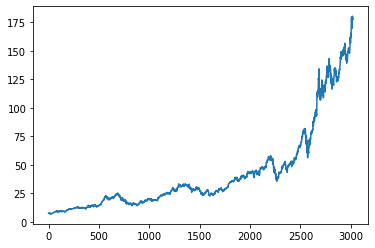

In [117]:
plt.plot(df.Close)

In [118]:
ma100 = df.Close.rolling(100).mean()
ma100


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

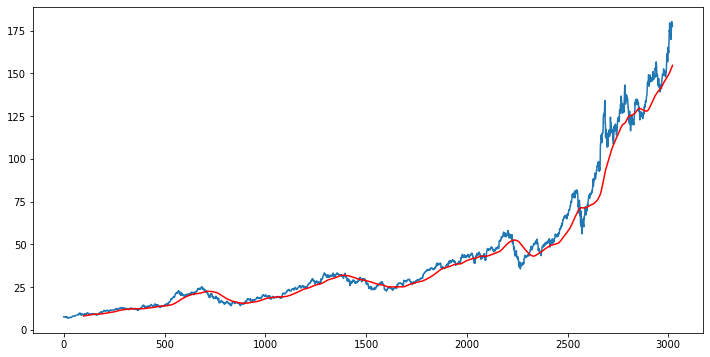

In [119]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')

In [120]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

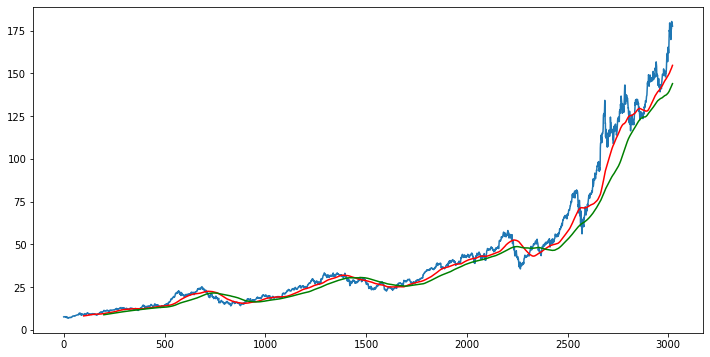

In [121]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')
plt.plot(ma200, 'g')

In [122]:
ma50 = df.Close.rolling(50).mean()
ma50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3017    159.597001
3018    160.286001
3019    160.942601
3020    161.531401
3021    162.097601
Name: Close, Length: 3022, dtype: float64

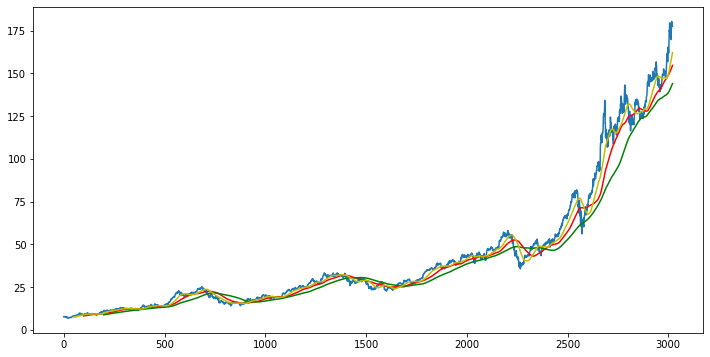

In [123]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')
plt.plot(ma200, 'g')
plt.plot(ma50, 'y')

In [124]:
df.shape

(3022, 5)

In [125]:
#spliting data into traaining and Testing

data_tr =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test =pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [126]:
data_tr.head(3)
data_tr.shape


(2115, 1)

In [127]:
data_test.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [128]:
print(data_tr.shape)
print(data_test.shape)

(2115, 1)
(907, 1)


In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_tr_array = scaler.fit_transform(data_tr)
data_tr_array

In [ ]:
x_train =[]
y_train =[]

for i in range(100, data_tr_array.shape[0]):
    x_train.append(data_tr_array[i-100: i])
    y_train.append(data_tr_array[i: 0])

In [ ]:
x_train =[]
y_train =[]

for i in range(100, data_tr_array.shape[0]):
    x_train.append(data_tr_array[i-100: i])
    y_train.append(data_tr_array[i: 0])
import numpy as np
x_train, y_train =np.array(x_train), np.array(y_train)
x_train.shape

In [133]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [134]:
x_train.shape

(2015, 100, 1)

In [135]:
model =Sequential()
model.add(LSTM(units =50, activation ='relu', return_sequences = True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

In [136]:
model.add(LSTM(units =60, activation ='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation ='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation ='relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [137]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_12 (LSTM)              (None, 100, 120)         

In [140]:
x_train.shape
y_train.shape

(2015, 0, 1)

In [146]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')




In [147]:
model.save('keras_model.h5')

In [148]:
data_test.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [149]:
past_100_days =data_tr.tail(100)

In [ ]:
final_df =past_100_days.append(data_tr, ignore_index=True)

In [155]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [156]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.8904703 ],
       [0.89539024],
       [0.90750555],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [157]:
input_data.shape

(2215, 1)

In [158]:
x_test = []
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [159]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2115, 100, 1)
(2115,)


In [160]:
y_predicted =model.predict(x_test)

67/67 [==============================] - 6s 69ms/step


In [162]:
y_predicted.shape

(2115, 100, 1)

In [163]:
y_test

array([0.01641142, 0.0192931 , 0.01961817, ..., 0.98966821, 0.98837669,
       0.9910212 ])

In [164]:
y_predicted

array([[[2.3570343e-05],
        [9.5123381e-05],
        [2.3246257e-04],
        ...,
        [8.8620093e-03],
        [8.9151561e-03],
        [8.9635327e-03]],

       [[2.3693556e-05],
        [9.5791605e-05],
        [2.3400618e-04],
        ...,
        [8.9151561e-03],
        [8.9635327e-03],
        [8.9706527e-03]],

       [[2.3996634e-05],
        [9.6623662e-05],
        [2.3549487e-04],
        ...,
        [8.9635327e-03],
        [8.9706536e-03],
        [8.9053521e-03]],

       ...,

       [[2.3393097e-05],
        [9.4018149e-05],
        [2.2926033e-04],
        ...,
        [8.6749820e-03],
        [8.7415166e-03],
        [8.8040456e-03]],

       [[2.3107626e-05],
        [9.3592942e-05],
        [2.2897133e-04],
        ...,
        [8.7415166e-03],
        [8.8040456e-03],
        [8.8620074e-03]],

       [[2.3574969e-05],
        [9.5019248e-05],
        [2.3183471e-04],
        ...,
        [8.8040465e-03],
        [8.8620093e-03],
        [8.9151561e-03]]

In [165]:
scaler = scaler.scale_

array([0.0245996])

In [166]:
scale_factor = 1/0.0245996
y_predicted = y_predicted * scale_factor
y_test = y_test* scale_factor

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(y_test, 'b', label ='Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
